Homerun Trends Across MLB, NPB and KBO

Myungkeun Park

Goal: How has the number of home runs changed over time in the 3 baseball leagues? We will compute a HR-rate (100 PA) for each season, plot the graphs (1954 - 2024) and add trend lines. 

First, we start by loading the MLB, NPB and KBO batting data. We hope to replace the hard coded paths with a package-level loader.

In [ ]:
from pathlib import Path
root = # full path to donwloaded CSV files

files = {"MLB": root/"mlb_batting.csv", "KBO": root/"kbo_batting.csv", "NPB": root/"npb_batting.csv",}

columns_needed = need_cols = ["yearID", "HR", "PA"]

Read each CSV into a pandas dataframe and add a lgID column. We concatenante them into a single table.

In [25]:
import pandas as pd

dfs = []
for lg, f in files.items():
    df = pd.read_csv(f, usecols=columns_needed).assign(lgID=lg)
    dfs.append(df)

batting = pd.concat(dfs, ignore_index=True)
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169890 entries, 0 to 169889
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   yearID  169890 non-null  object 
 1   HR      169890 non-null  int64  
 2   PA      129994 non-null  float64
 3   lgID    169890 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ MB


C:\Users\Acer\AppData\Local\Temp\ipykernel_15552\1661859415.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, usecols=columns_needed).assign(lgID=lg)


We drop rows whose yearID isn't a clean integer: NPB 1936.1S, 1936.1F, 1937.1S, 1937.1F, 1938.1S, 1938.1F
Futher data cleansing will be performed for the yearID listed above.

In [45]:
batting_clean = (batting.assign(yearID_num = pd.to_numeric(batting["yearID"], errors="coerce"))
.dropna(subset=["yearID_num"]).assign(yearID = lambda d: d.yearID_num.astype(int)).drop(columns="yearID_num"))

HR per 100 PA controls the season legth differences. KBO and NPB plays 144 games per season whereas MLB plays 162 games.
We calculate the HR_per100PA using the formula HR_total / PA_total * 100.0

In [46]:
hr_rate = (batting_clean.groupby(["lgID", "yearID"], as_index=False).agg(HR_total=("HR", "sum"), PA_total=("PA", "sum"))
.assign(HR_per100PA=lambda d: d.HR_total / d.PA_total * 100.0))

hr_rate.head()

,lgID,yearID,HR_total,PA_total,HR_per100PA
0,KBO,1982,354,16519.0,2.142987
1,KBO,1983,392,20111.0,1.949182
2,KBO,1984,368,20402.0,1.803745
3,KBO,1985,439,22646.0,1.938532
4,KBO,1986,387,26081.0,1.483839


We restrict the analysis to sesasons with complete data. For example, MLB plate-appearance totals aren't available before 1954. Also, KBO statistics begin only in 1980s.

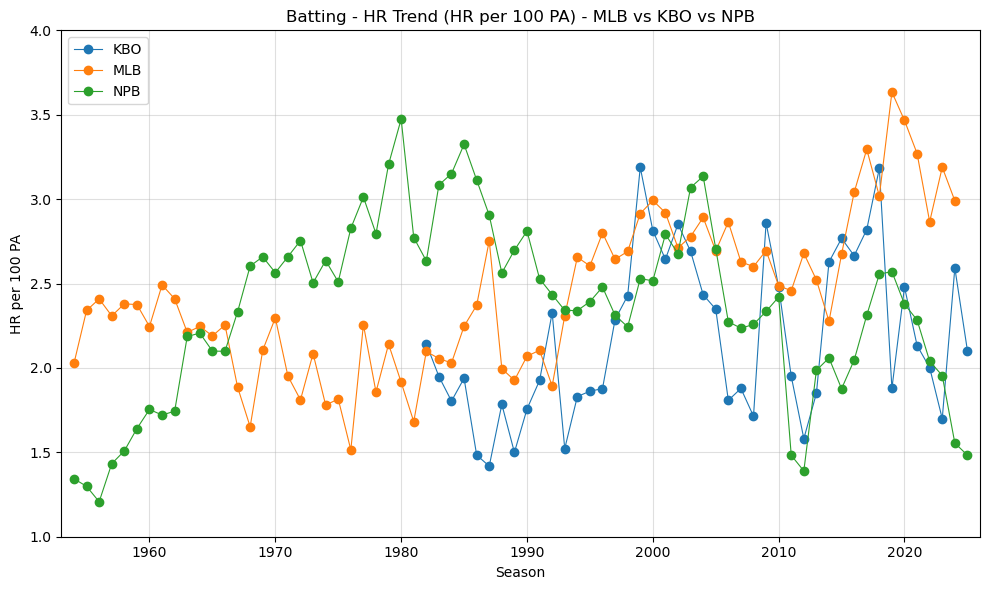

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for lg, sub in hr_rate.groupby("lgID"):
    plt.plot(sub.yearID, sub.HR_per100PA, marker="o", linewidth=0.8, label=lg)

plt.title("Batting - HR Trend (HR per 100 PA) - MLB vs KBO vs NPB")
plt.xlabel("Season")
plt.ylabel("HR per 100 PA")
plt.xlim(1953, 2026)
plt.ylim(1, 4)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


Some quick take-aways: 

> MLB: Steady upward trend from 2 to 3.5+ HR/100 PA shows an increase in HR frequency
> KBO: "M-W" shape; a repetition of rise and drop; lack of data? Policy-related? Mimicking other league strategies?  
> NPB: 1980 peak (~3.5) then declines to ~1.5 HR/100 PA suggests a contact-oriented offence over aggresive power swings  